In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
old_outputs = pd.read_csv('./file_logit_agg.csv')

In [3]:
new_outputs = pd.read_csv('./logits_2021_by_file.csv')

In [13]:
def get_merged_single_species(sixcode, fourcode, old, new):
    old_sp = old[old['species'] == fourcode]
    new_sp = new[new['species6'] == sixcode]
    merged = new_sp.merge(old_sp, on=['Date_Time', 'point'])
    return merged

In [34]:
merged = get_merged_single_species('btywar',
                                   'BTYW',
                                   old_outputs,
                                   new_outputs)

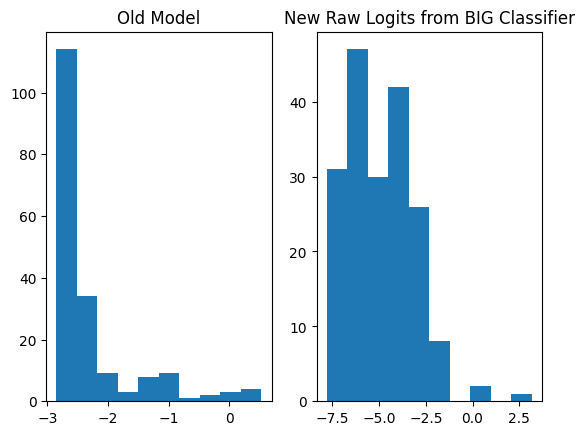

In [35]:
plt.subplot(1,2,1)
plt.hist(merged['max_logit'])
plt.title('Old Model')

plt.subplot(1,2,2)
plt.hist(merged['max'])
plt.title('New Raw Logits from BIG Classifier')

plt.show()

In [16]:
max_diff = merged['max'] - merged['max_logit']

In [19]:
max_diff

0     -0.160846
1     -1.689956
2     -3.864764
3     -0.400025
4     -5.079467
         ...   
182   -4.171699
183   -4.020813
184   -4.768160
185   -3.001908
186   -5.635087
Length: 187, dtype: float64

(array([20., 36., 29., 15., 22., 22., 15., 16.,  7.,  5.]),
 array([-6.402535 , -5.5857335, -4.768932 , -3.9521305, -3.135329 ,
        -2.3185275, -1.501726 , -0.6849245,  0.131877 ,  0.9486785,
         1.76548  ]),
 <BarContainer object of 10 artists>)

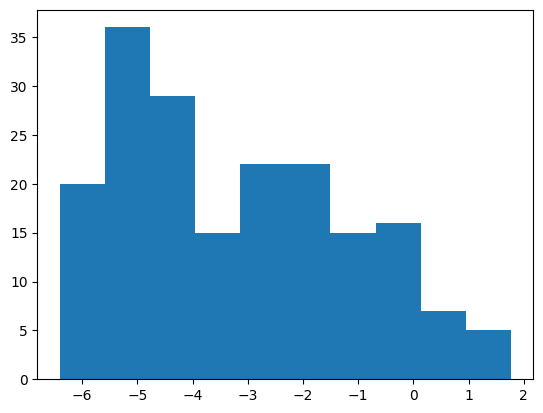

In [18]:
plt.hist(max_diff)